# Exercise 4.10 Part 1

## Contents

### 01 Importing Libraries

### 02 Importing Data

### 04 Creating Data Dictionary

### 05 Following Exercise 4.10 Directions

#### 01 Importing Data

#### 02 Security Implications

#### 03 Creating Regions

#### 04 Creating Exclusion Flag

#### 05 Customer Profiling

#### 06 Customer Profile Visualizations

#### 07 Customer Profile Aggregation

#### 08 Comparing Customer Profiles with Regions

#### 09 Creating Comparison Visualizations

#### 10 Exporting Data

## 01 Importing Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02 Importing Data

In [4]:
#create path
path = r'C:\\Users\\samac\\Instacart Basket Analysis'

In [6]:
#importing 'final_orders_products_all_4_9_complete.pkl'
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_orders_products_all_4_9_complete.pkl'))

In [7]:
#checking shape of ords_prods_all
ords_prods_all.shape

(32404859, 34)

In [8]:
#importing 'final_departments_wrangled.pkl'
df_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_departments_wrangled.pkl'))

## 03 Creating Data Dictionary

In [10]:
#creating a data dictionary using the df_dep dataframe
data_dict = df_dep.to_dict('index')
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

## 04 Following Exercise 4.10 Directions

### 01 Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

This has been completed in section 02 Importing Data

### 02 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The first_name and last_name columns will be dropped in order to scrub any PII data

In [16]:
#dropping first_name and last_name columns
ords_prods_all = ords_prods_all.drop(columns = ['first_name', 'last_name'])

In [17]:
#checking all columns to confirm first_name and last_name have been dropped
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'days_since_prior_order_flag', 'add_to_cart_order', 'reordered',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'days_since_prior_order_median', 'frequency_flag'],
      dtype='object')

### 03 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### 01 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [20]:
#creating a list that assigns a region to each state

region_list = []

for value in ords_prods_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_list.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region_list.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_list.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region_list.append('West')

In [21]:
#adding 'region' column that populates off region_list
ords_prods_all['region'] = region_list

In [22]:
#checking value count of region column
ords_prods_all['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### 02 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [24]:
#creating a crosstab using the 'region' and 'spending_flag' columns
region_crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)
region_crosstab.to_clipboard()

In [25]:
region_crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


After performing some calculations, it can be determined that each region has roughly 2% of its users categorized as 'High-Spenders' and roughly 98% of its users categorized as 'Low-Spenders'. There is no discernable difference in spending habits between the regions in the United States

### 04 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [28]:
#creating spending flag for low-activity users
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'activity_flag'] = 'Low-Activity'

In [29]:
#creating spending flag for high-activity users
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'High-Activity'

In [30]:
#checking value counts of activity_flag column
ords_prods_all['activity_flag'].value_counts(dropna = False)

activity_flag
High-Activity    30964564
Low-Activity      1440295
Name: count, dtype: int64

In [31]:
#creating a new dataframe that only includes 'High-Activity' users
ords_prods_complete = ords_prods_all[ords_prods_all['activity_flag'] == 'High-Activity']

In [32]:
#checking shape of ords_prods_complete
ords_prods_complete.shape

(30964564, 34)

### 05 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### 01 Creating Age Profiles

This section will label each user by their generation

Generation Z: Ages 18 - 27
Generation Y: Ages 28 - 43
Generation X: Ages 44 - 59
Baby Boomers: Ages 60 - 74
Silent Generation: Ages 75+

In [36]:
#creating Generation Z generation flag
ords_prods_complete.loc[(ords_prods_complete['age'] >= 18) & (ords_prods_complete['age'] < 28), 'generation_flag'] = 'Generation Z'

C:\Users\samac\AppData\Local\Temp\ipykernel_6964\3410575510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_complete.loc[(ords_prods_complete['age'] >= 18) & (ords_prods_complete['age'] < 28), 'generation_flag'] = 'Generation Z'


In [37]:
#creating Generation Y generation flag
ords_prods_complete.loc[(ords_prods_complete['age'] >= 28) & (ords_prods_complete['age'] < 44), 'generation_flag'] = 'Generation Y'

In [38]:
#creating Generation X generation flag
ords_prods_complete.loc[(ords_prods_complete['age'] >= 44) & (ords_prods_complete['age'] < 60), 'generation_flag'] = 'Generation X'

In [39]:
#creating Baby Boomer generation flag
ords_prods_complete.loc[(ords_prods_complete['age'] >= 60) & (ords_prods_complete['age'] < 75), 'generation_flag'] = 'Baby Boomer'

In [40]:
#creating Silent Generation generation flag
ords_prods_complete.loc[(ords_prods_complete['age'] >= 75), 'generation_flag'] = 'Silent Generation'

In [41]:
#checking value counts of generation flag
generation_values = ords_prods_complete['generation_flag'].value_counts(dropna = False)
generation_values

generation_flag
Generation X         7805548
Generation Y         7729031
Baby Boomer          7161875
Generation Z         4855481
Silent Generation    3412629
Name: count, dtype: int64

#### 02 Creating Income Profiles

This section will label users by their income

Lower class: Incomes below 60,000
Middle class: Incomes between 60,000 and 149,999
Upper class: Incomes at or greater than 150,000 

In [44]:
#creating Lower class income flag
ords_prods_complete.loc[(ords_prods_complete['income'] < 60000), 'income_flag'] = 'Lower class'

C:\Users\samac\AppData\Local\Temp\ipykernel_6964\1665111283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_complete.loc[(ords_prods_complete['income'] < 60000), 'income_flag'] = 'Lower class'


In [45]:
#creating Middle class income flag
ords_prods_complete.loc[(ords_prods_complete['income'] >= 60000) & (ords_prods_complete['income'] < 150000), 'income_flag'] = 'Middle class'

In [46]:
#creating Upper class income flag
ords_prods_complete.loc[(ords_prods_complete['income'] >= 150000), 'income_flag'] = 'Upper class'

In [47]:
#checking value counts of income flag
income_values = ords_prods_complete['income_flag'].value_counts(dropna = False)
income_values

income_flag
Middle class    21266539
Lower class      5802750
Upper class      3895275
Name: count, dtype: int64

#### 03 Creating Dependant Profiles

This section will label whether or not users have dependants

In [50]:
#creating No dependants dependant_flag
ords_prods_complete.loc[(ords_prods_complete['n_dependants'] == 0), 'dependant_flag'] = 'No dependants'

C:\Users\samac\AppData\Local\Temp\ipykernel_6964\2656526978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_complete.loc[(ords_prods_complete['n_dependants'] == 0), 'dependant_flag'] = 'No dependants'


In [51]:
#creating Has dependant()s dependant_flag
ords_prods_complete.loc[(ords_prods_complete['n_dependants'] != 0), 'dependant_flag'] = 'Has dependant(s)'

In [52]:
#checking value counts of dependant_flag
dependant_values = ords_prods_complete['dependant_flag'].value_counts(dropna = False)
dependant_values

dependant_flag
Has dependant(s)    23224883
No dependants        7739681
Name: count, dtype: int64

### 06 Create an appropriate visualization to show the distribution of profiles.

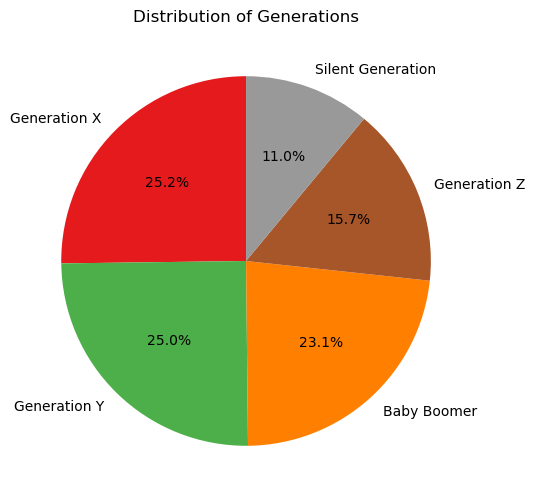

In [83]:
#the follow code has been generated using ChatGPT
#creating a pie chart to show the distribution of generation_flag values
plt.figure(figsize=(6,6))
pie_generation = generation_values.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set1')
plt.title('Distribution of Generations')
plt.ylabel('')  # Hide the y-label
plt.show()

In [85]:
#exporting pie_generation
pie_generation.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_pie_generation.png'))

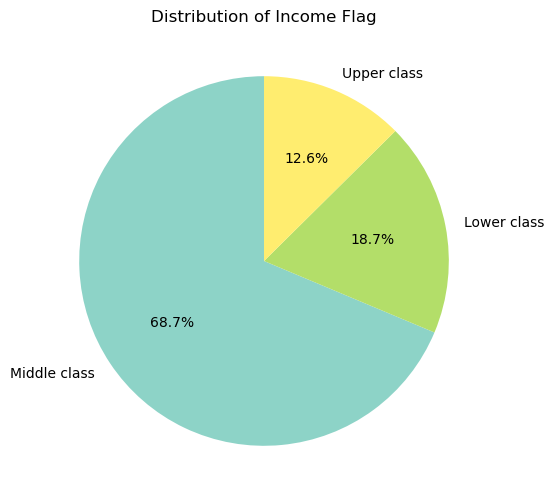

In [71]:
#the follow code has been generated using ChatGPT
#creating a pie chart to show the distribution of income_flag values
plt.figure(figsize=(6,6))
pie_income = income_values.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Income Flag')
plt.ylabel('')  # Hide the y-label
plt.show()

In [72]:
#exporting pie_income
pie_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_pie_income.png'))

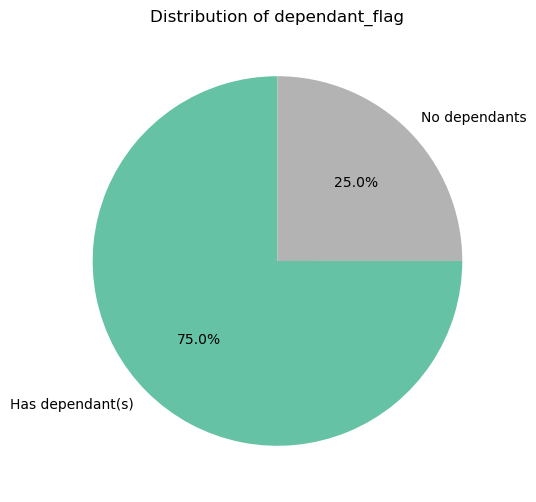

In [91]:
#the follow code has been generated using ChatGPT
#creating a pie chart to show the distribution of dependant_flag values
plt.figure(figsize=(6,6))
pie_dependants = dependant_values.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of dependant_flag')
plt.ylabel('')  # Hide the y-label
plt.show()

In [93]:
#exporting pie_dependants
pie_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_pie_dependants.png'))

### 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [76]:
#aggregating max, mean, and min of order numbers, grouped by generation_flag
ords_prods_complete.groupby('income_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                     mean min max
income_flag                      
Lower class     17.237925   1  99
Middle class    17.952205   1  99
Upper class     18.077743   1  99

In [77]:
#aggregating max, mean, and min of prices, grouped by generation_flag

In [78]:
ords_prods_complete.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_flag                      
Lower class   7.083502  1.0  25.0
Middle class  7.956055  1.0  25.0
Upper class   7.940758  1.0  25.0

### 08 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Please see Script 12 Final Analysis and Visualizations

### 09 Produce suitable charts to illustrate your results and export them in your project folder

Please see Script 12 Final Analysis and Visualizations

### 10 Tidy up your script, export your final data set, and save your notebook.

In [82]:
#exporting dataframe
ords_prods_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_orders_products_complete.pkl'))

In [83]:
ords_prods_complete.shape

(30964564, 37)